In [216]:
%config IPCompleter.greedy=True

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [218]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [219]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height: 70% !important;}</style>"
HTML(style)

In [220]:
titanic_data = pd.read_csv('titanic/train.csv')

In [221]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [222]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [298]:
Y = titanic_data.Survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [225]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [226]:
X = pd.get_dummies(X)   # One-Hot Encoding

In [227]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [228]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [229]:
X = X.fillna({'Age':X.Age.median()})

In [230]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [231]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [232]:
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
#graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),\
#                                    class_names=['Died', 'Survived'], filled=True))
#display(SVG(graph.pipe(format='svg')))

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [236]:
X_train.shape

(596, 10)

In [237]:
clf.score(X, Y)

0.9797979797979798

In [238]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [239]:
clf.score(X_train, y_train)

0.9798657718120806

In [240]:
clf.score(X_test, y_test)

0.7796610169491526

In [241]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [242]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [243]:
clf.score(X_train, y_train)

0.7818791946308725

In [244]:
clf.score(X_test, y_test)

0.7966101694915254

In [245]:
max_depth_values = range(1, 100)

In [246]:
scores_data = pd.DataFrame()

In [247]:
for d in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    t = pd.DataFrame({'max_depth': [d],\
                      'train_score': [train_score],\
                      'test_score': [test_score],\
                     'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(t)

In [248]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.805345


In [249]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],\
                           value_vars=['train_score','test_score','cross_val_score'],\
                           var_name='set_type',\
                           value_name='score')

In [250]:
print(scores_data_long.shape)
scores_data_long.head()

(297, 3)


,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


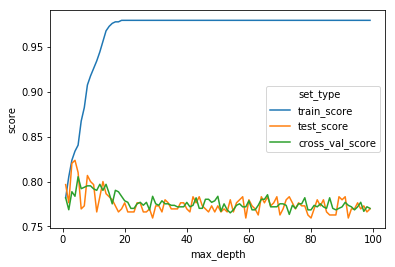

In [251]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

c:\python36\lib\site-packages\matplotlib\axes\_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


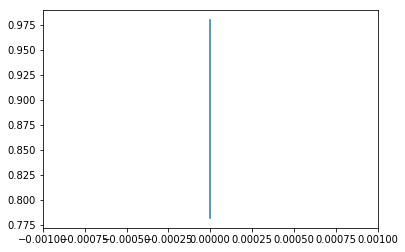

In [197]:
#scores_data.train_score.plot()
#scores_data.test_score.plot(legend = True) 

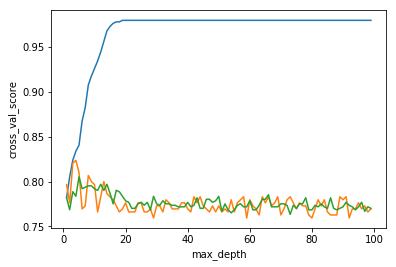

In [253]:
sns.lineplot(x='max_depth', y='train_score', data=scores_data)
sns.lineplot(x='max_depth', y='test_score', data=scores_data)
sns.lineplot(x='max_depth', y='cross_val_score', data=scores_data)

In [199]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [204]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [256]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.805345
203,6,cross_val_score,0.792041
204,7,cross_val_score,0.793636
205,8,cross_val_score,0.795232
206,9,cross_val_score,0.795218
207,10,cross_val_score,0.791857


Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [283]:
np.random.seed(0)

In [335]:
df = pd.read_csv("train_iris.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,7.4,2.8,6.1,1.9,2
1,5.0,3.4,1.5,0.2,0
2,4.8,3.4,1.6,0.2,0
3,5.8,2.7,5.1,1.9,2
4,7.2,3.6,6.1,2.5,2


In [336]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [340]:
X_train = df.drop(['species'], axis=1)
X_train.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


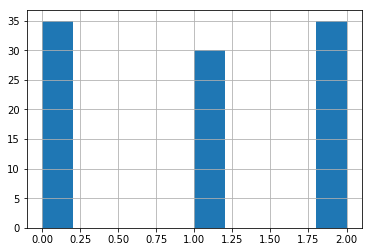

In [341]:
y_train = df.species
y_train.hist()

In [342]:
df = pd.read_csv("test_iris.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.8,2.8,5.1,2.4,2
1,5.9,3.2,4.8,1.8,1
2,6.0,3.0,4.8,1.8,2
3,5.2,2.7,3.9,1.4,1
4,5.1,3.8,1.9,0.4,0


In [344]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [345]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
X_test = df.drop(['species'], axis=1)
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


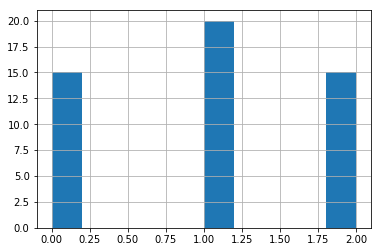

In [346]:
y_test = df.species
y_test.hist()

In [350]:
X_test.shape

(50, 4)

In [351]:
scores_data = pd.DataFrame()

In [352]:
for d in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    t = pd.DataFrame({'max_depth': [d],\
                      'train_score': [train_score],\
                      'test_score': [test_score],\
                     'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(t)

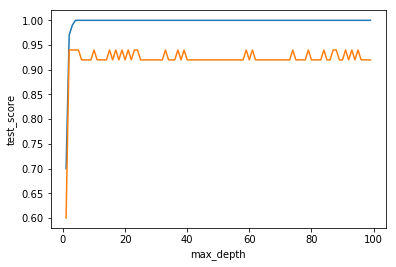

In [353]:
sns.lineplot(x='max_depth', y='train_score', data=scores_data)
sns.lineplot(x='max_depth', y='test_score', data=scores_data)
#sns.lineplot(x='max_depth', y='cross_val_score', data=scores_data)

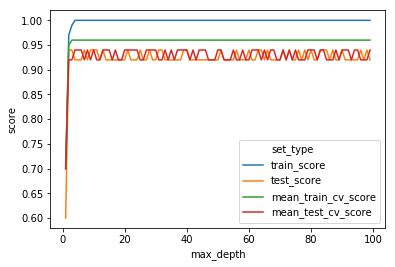

In [361]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
train_iris = pd.read_csv('train_iris.csv', index_col=0)
test_iris = pd.read_csv('test_iris.csv', index_col=0)
X_train = train_iris.drop('species', axis=1)
y_train = train_iris.species
X_test = test_iris.drop('species', axis=1)
y_test = test_iris.species

max_depth_values = range(1, 100)
scores = pd.DataFrame()

for max_depth in max_depth_values:
    clf =  DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_train_cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    mean_test_cv_score = cross_val_score(clf, X_test, y_test, cv=5).mean()
    temp_score = pd.DataFrame({
      'max_depth': [max_depth],
      'train_score': [train_score],
      'test_score': [test_score],
      'mean_train_cv_score': [mean_train_cv_score],
      'mean_test_cv_score': [mean_test_cv_score]})
    scores = scores.append(temp_score)

scores_long = pd.melt(scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'mean_train_cv_score', 'mean_test_cv_score'],
    var_name='set_type', value_name='score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_long)
plt.show()

In [509]:
# https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv
df = pd.read_csv('dogs_n_cats.csv')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [510]:
df = pd.get_dummies(df)   # One-Hot Encoding
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1


In [511]:
df = df.drop('Вид_котик', axis=1).rename(index=str, columns={'Вид_собачка':'target'})
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,target
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [512]:
X = df.drop('target', axis=1)
y = df.target

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

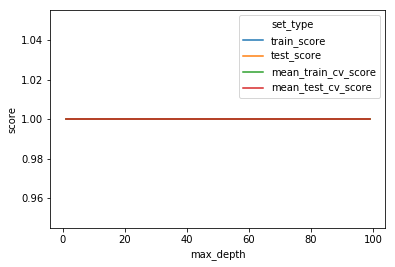

In [514]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#np.random.seed(0)
#train = pd.read_csv('dogs_n_cats.csv', index_col=0)
#test = pd.read_csv('test_iris.csv', index_col=0)
#X = df.drop('target', axis=1)
#y = df.target

#X_test = test_iris.drop('species', axis=1)
#y_test = test_iris.species

max_depth_values = range(1, 100)
scores = pd.DataFrame()

for max_depth in max_depth_values:
    clf =  DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_train_cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    mean_test_cv_score = cross_val_score(clf, X_test, y_test, cv=5).mean()
    temp_score = pd.DataFrame({
      'max_depth': [max_depth],
      'train_score': [train_score],
      'test_score': [test_score],
      'mean_train_cv_score': [mean_train_cv_score],
      'mean_test_cv_score': [mean_test_cv_score]
    })
    scores = scores.append(temp_score)

scores_long = pd.melt(scores,
    id_vars=['max_depth'],
    value_vars=['train_score',\
                'test_score',\
                'mean_train_cv_score',\
                'mean_test_cv_score'\
               ],
    var_name='set_type', value_name='score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_long)
plt.show()

In [544]:
X.count()
X = X.drop(['Высота','Длина', 'Шерстист'], axis=1)

In [545]:
clf =  DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X, y)
train_score = clf.score(X, y)
train_score
#    test_score = clf.score(X_test, y_test)
#cross_val_score(clf, X, y, cv=5).mean()


0.976

In [546]:
clf.feature_importances_

array([0.07866081, 0.92133919])

In [532]:
# https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv
df = pd.read_json('dataset_209691_15.txt')
#df = pd.read_csv('dogs_n_cats.csv')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,30,36.0,1,1,0
10,28,33.6,1,1,0
11,32,38.4,1,1,0
12,19,22.8,1,1,0


In [528]:
df = pd.get_dummies(df)   # One-Hot Encoding
df.head()

In [529]:
df = df.drop('Вид_котик', axis=1).rename(index=str, columns={'Вид_собачка':'target'})
df.head()

In [530]:
t = df.drop('target', axis=1)
#y = df.target
t.head()

In [534]:
np.count_nonzero(clf.predict(df))

41

In [535]:
#np.unique(clf.predict(df_test),return_counts=True)

pd.Series( clf.predict(df) ).value_counts()

0    59
1    41
dtype: int64

In [ ]:
neworder = ['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']
df_test_new = df_test.reindex(columns = neworder)

In [498]:
y.value_counts()

1    500
0    500
Name: target, dtype: int64

In [542]:
unique, counts = np.unique( clf.predict(df), return_counts=True)
dict(zip(unique, counts))

{0: 59, 1: 41}

Теперь исплозьуем перебор параметров GridSearchCV

In [629]:
titanic_data = pd.read_csv('titanic/train.csv')
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
X = pd.get_dummies(X)   # One-Hot Encoding
X = X.fillna({'Age':X.Age.median()})
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [630]:
from sklearn.model_selection import GridSearchCV

In [631]:
clf = tree.DecisionTreeClassifier()

In [632]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,100)}

In [633]:
grid_searh_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_searh_cv_clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)},
             pre_dispat

In [634]:
grid_searh_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)},
             pre_dispat

In [635]:
grid_searh_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [636]:
best_clf = grid_searh_cv_clf.best_estimator_

In [637]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [642]:
from sklearn.metrics import precision_score, recall_score

In [643]:
y_pred = best_clf.predict(X_test)

In [644]:
 precision_score(y_test, y_pred)

0.7745098039215687

In [645]:
recall_score(y_test, y_pred)

0.7117117117117117

In [646]:
y_pred_prob = best_clf.predict_proba(X_test)

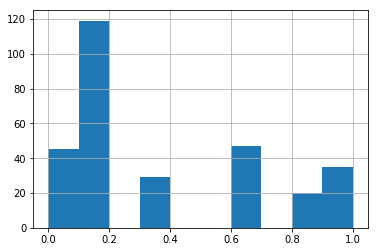

In [649]:
pd.Series(y_pred_prob[:,1]).hist()

In [653]:
t = np.where(y_pred_prob[:,1] > 0.8, 1, 0)

In [654]:
precision_score(y_test, t)

0.9636363636363636

In [655]:
recall_score(y_test, t)

0.4774774774774775

In [656]:
t = np.where(y_pred_prob[:,1] > 0.2, 1, 0)

In [657]:
precision_score(y_test, t)

0.6946564885496184

In [658]:
recall_score(y_test, t)

0.8198198198198198